# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### The initial discussion in the paper talks about the inefficency of a mass marketing campaign versus a direct one. The authors decided to proceed with direct marketing campaigsn and did 17 of them between May 2008 and November 2010. Out of 79,354 contacts, 6499 were a success representing roughly 8%.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [177]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [8]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [14]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Data doesn't seem to have any missing values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Convert the necessary "object" into numerical for "default", "housing", "loan" and target feature "y"

In [20]:
df['default'] = df['default'].str.replace("yes", "1")
df['default'] = df['default'].str.replace("no", "0")
df['housing'] = df['housing'].str.replace("yes", "1")
df['housing'] = df['housing'].str.replace("no", "0")
df['loan'] = df['loan'].str.replace("yes", "1")
df['loan'] = df['loan'].str.replace("no", "0")
df['y'] = df['y'].str.replace("yes", "1")
df['y'] = df['y'].str.replace("no", "0")


In [22]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unk0wn,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


#### Ha! now we realize that we have unknowns... let's look at those

In [25]:
df.default.value_counts()

default
0         32588
unk0wn     8597
1             3
Name: count, dtype: int64

In [27]:
df.housing.value_counts()

housing
1         21576
0         18622
unk0wn      990
Name: count, dtype: int64

In [29]:
df.loan.value_counts()

loan
0         33950
1          6248
unk0wn      990
Name: count, dtype: int64

In [31]:
df.y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

#### Based on the info above, default has only 3 yes and lots of unknowns and should be dropped. Housing and loan have 990 each out of 33k records so we can drop those unknowns and then convert housing, loan and y into numeric

In [34]:
df_copy = df
df_copy = df_copy.drop(df[df['loan'] == "unk0wn"].index, axis=0)
df_copy = df_copy.drop(columns="default", axis = 1)


In [36]:
df_copy.housing.value_counts()

housing
1    21576
0    18622
Name: count, dtype: int64

In [38]:
df_copy.loan.value_counts()

loan
0    33950
1     6248
Name: count, dtype: int64

In [40]:
df_copy['housing'] = pd.to_numeric(df_copy['housing'])
df_copy['loan'] = pd.to_numeric(df_copy['loan'])
df_copy['y'] = pd.to_numeric(df_copy['y'])

In [53]:
df_copy.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,1,0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,1,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [56]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40198 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40198 non-null  int64  
 1   job             40198 non-null  object 
 2   marital         40198 non-null  object 
 3   education       40198 non-null  object 
 4   housing         40198 non-null  int64  
 5   loan            40198 non-null  int64  
 6   contact         40198 non-null  object 
 7   month           40198 non-null  object 
 8   day_of_week     40198 non-null  object 
 9   duration        40198 non-null  int64  
 10  campaign        40198 non-null  int64  
 11  pdays           40198 non-null  int64  
 12  previous        40198 non-null  int64  
 13  poutcome        40198 non-null  object 
 14  emp.var.rate    40198 non-null  float64
 15  cons.price.idx  40198 non-null  float64
 16  cons.conf.idx   40198 non-null  float64
 17  euribor3m       40198 non-null  floa

#### The objective is to be able to create a model that will predict if the the customer will open an account with the bank based on other features in the dataset. The target feature is "y"

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### Let's start looking at the numeric features first and their correlation

Text(0.5, 1.0, 'Correlation Matrix')

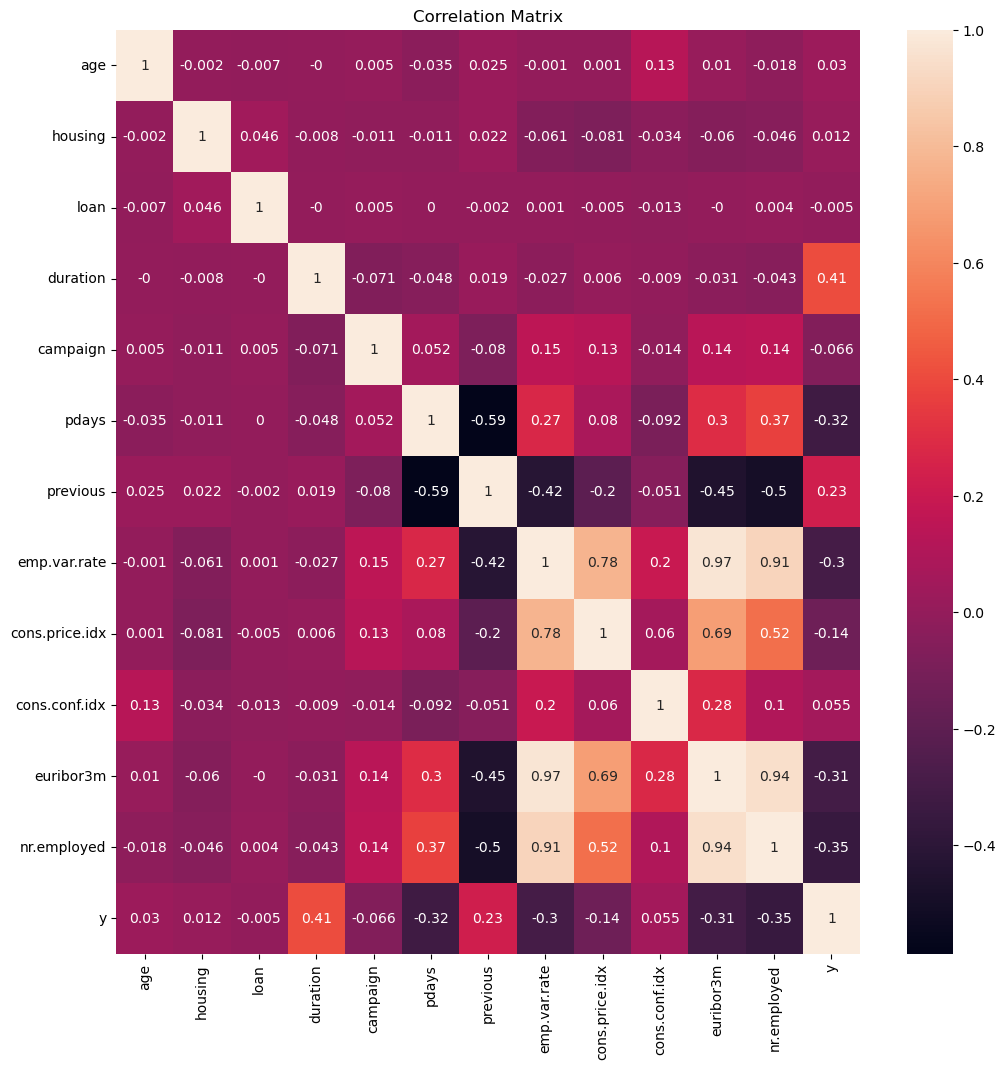

In [63]:
plt.figure(figsize = [12,12])
corr = df_copy.corr(numeric_only = True).round(3)
sns.heatmap(corr, annot = True)
plt.title("Correlation Matrix")

### Looks like Duration, pdays, emp.var.rate, euribor3m and nr.employed have the biggest or smallest numbers. Let's use these first

In [66]:
y = df_copy['y']
X = df_copy[['duration', 'pdays', 'emp.var.rate', 'euribor3m', 'nr.employed']]

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [75]:
1-y_train.mean()

0.888052275441157

In [77]:
1-y_test.mean()

0.8847761194029851

Let's also look with the dummy classifier

In [80]:
from sklearn.dummy import DummyClassifier

In [82]:
dummy_clf = DummyClassifier().fit(X_train, y_train)
dummy_score = dummy_clf.score(X_test, y_test)
print(dummy_score)

0.8847761194029851


#### ok - 88.5% seems to be the number to beat

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [87]:
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

In [89]:

start_time = time.time()
LR = Pipeline([
    ("scale", StandardScaler()),
    ("logistic", LogisticRegression())
])

LR.fit(X_train, y_train)
LR_time = round(time.time() - start_time, 3)
print(LR_time)


0.04


### Problem 9: Score the Model

What is the accuracy of your model?

In [92]:
train_LR = LR.score(X_train, LR.predict(X_train))
score_LR = LR.score(X_test, y_test)

print(train_LR)
print(score_LR)

1.0
0.9057711442786069


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

## Simple Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
start_time = time.time()
DT = Pipeline([
    ("scale", StandardScaler()),
    ("decision", DecisionTreeClassifier())
])
DT.fit(X_train, y_train)
DT_time = round(time.time() - start_time, 3)
print(DT_time)

train_DT = DT.score(X_train, LR.predict(X_train))
score_DT = DT.score(X_test, y_test)
    
print(train_DT)
print(score_DT)


0.069
0.9153177656892663
0.8881592039800995


## Simple KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
start_time = time.time()
KNN = Pipeline([
    ("scale", StandardScaler()),
    ("neighbor", KNeighborsClassifier())
])

KNN.fit(X_train, y_train)
KNN_time = round(time.time() - start_time, 3)
print(KNN_time)

train_KNN = KNN.score(X_train, LR.predict(X_train))
score_KNN = KNN.score(X_test, y_test)
    
print(train_KNN)
print(score_KNN)


0.03
0.9374751227278758
0.9000995024875622


## Simple SVM

In [102]:
from sklearn.svm import SVC

In [103]:
start_time = time.time()
SVM = Pipeline([
    ("scale", StandardScaler()),
    ("svm", SVC())
])

SVM.fit(X_train, y_train)
SVM_time = round(time.time() - start_time, 3)
print(SVM_time)

train_SVM = SVM.score(X_train, LR.predict(X_train))
score_SVM = SVM.score(X_test, y_test)

print(train_SVM)
print(score_SVM)


9.106
0.9799323338198223
0.9106467661691542


In [106]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "KNN", "SVM"],
    "Train Time": [LR_time, DT_time, KNN_time, SVM_time],
    "Train Accuracy": [train_LR, train_DT, train_KNN, train_SVM],
    "Test Accuracy": [score_LR, score_DT, score_KNN, score_SVM]
})
results

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.040,1.000000,0.905771
1,Decision Tree,0.069,0.915318,0.888159
2,KNN,0.030,0.937475,0.900100
3,SVM,9.106,0.979932,0.910647


### So our best model with default parameter and limited features is the Support Vector Machine

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

## 1- Let's add some of those categorical features, without gender as they mention in the study it had no impact on the success rate

Let's create a new dataset with all the categorical features

In [112]:
y2 = df_copy['y']
X2 = df_copy.drop('y', axis =1)

In [114]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40198 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40198 non-null  int64  
 1   job             40198 non-null  object 
 2   marital         40198 non-null  object 
 3   education       40198 non-null  object 
 4   housing         40198 non-null  int64  
 5   loan            40198 non-null  int64  
 6   contact         40198 non-null  object 
 7   month           40198 non-null  object 
 8   day_of_week     40198 non-null  object 
 9   duration        40198 non-null  int64  
 10  campaign        40198 non-null  int64  
 11  pdays           40198 non-null  int64  
 12  previous        40198 non-null  int64  
 13  poutcome        40198 non-null  object 
 14  emp.var.rate    40198 non-null  float64
 15  cons.price.idx  40198 non-null  float64
 16  cons.conf.idx   40198 non-null  float64
 17  euribor3m       40198 non-null  floa

In [116]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [118]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.feature_selection import SelectFromModel

### First let's look at the Logistic Regression (including categorical features)

I'll use the OneHotEncoder for the categorical features

In [121]:
selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(drop = 'first'), selector),
                                     remainder = StandardScaler())
extractor = SelectFromModel(LogisticRegression(random_state = 42))

In [123]:
start_time = time.time()
LR_pipe = Pipeline([('transformer', transformer),
                    ('selector', extractor),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])

LR_pipe.fit(X2_train, y2_train)
LR_pipe_time = round(time.time() - start_time, 3)
print(LR_pipe_time)

0.401


In [127]:
pipe_score_LR = LR_pipe.score(X2_test, y2_test)

print(pipe_score_LR)

0.9066666666666666


So we went from 90.57 to 90.66 with a simple regression, let's try the Grid Search on this

## Logistic Regression Grid Search with all features

In [131]:
params1 = {'penalty': ["l1", "l2", "elasticnet"],
           'solver': ['liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs']
         }

start_time = time.time()
lgr_pipe_grid = Pipeline([('transformer', transformer),
                          ('selector', extractor),
                          ('grid', GridSearchCV(LogisticRegression(), param_grid=params1))
                         ])


lgr_pipe_grid.fit(X2_train, y2_train)
LR_pipe_grid_time = round(time.time() - start_time, 3)
print(LR_pipe_grid_time)

11.275


In [132]:
pipe_score_grid_LR = lgr_pipe_grid.score(X2_test, y2_test)

print(pipe_score_grid_LR)

0.9066666666666666


It doesn't seem to have made a difference

In [136]:
LR1 = lgr_pipe_grid['grid'].best_params_['penalty']
LR2 = lgr_pipe_grid['grid'].best_params_['solver']
print(LR1)
print(LR2)

l1
liblinear


## Let's look at the other ones with a grid search as well including all the categorical features

## Decision Tree Grid Search with all features

In [140]:
params2 = {'max_depth': [2,3,4,5,6],
           'criterion': ["gini","entropy","log_loss"]
         }

start_time = time.time()
DT_pipe_grid = Pipeline([('transformer', transformer),
                          ('selector', extractor),
                          ('grid', GridSearchCV(DecisionTreeClassifier(), param_grid=params2))
                         ])


DT_pipe_grid.fit(X2_train, y2_train)
DT_pipe_grid_time = round(time.time() - start_time, 3)
print(DT_pipe_grid_time)

1.912


In [141]:
DT_pipe_grid_score = DT_pipe_grid.score(X2_test, y2_test)
    
print(DT_pipe_grid_score)

0.9092537313432836


In [142]:
DT1 = DT_pipe_grid['grid'].best_params_['max_depth']
DT2 = DT_pipe_grid['grid'].best_params_['criterion']
print(DT1)
print(DT2)

5
gini


## KNN Grid Search with all features

In [147]:
params3 = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

start_time = time.time()
KNN_pipe_grid = Pipeline([('transformer', transformer),
                          ('selector', extractor),
                          ('grid', GridSearchCV(KNeighborsClassifier(), param_grid=params3))
                         ])


KNN_pipe_grid.fit(X2_train, y2_train)
KNN_pipe_grid_time = round(time.time() - start_time, 3)
print(KNN_pipe_grid_time)

35.544


In [148]:
KNN_pipe_grid_score = KNN_pipe_grid.score(X2_test, y2_test)
    
print(KNN_pipe_grid_score)

0.9071641791044777


In [149]:
KNN1 = KNN_pipe_grid['grid'].best_params_['n_neighbors']
KNN1

13

## SVM Grid Search with all features

In [154]:
params4 = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}

start_time = time.time()
SVM_pipe_grid = Pipeline([('transformer', transformer),
                          ('selector', extractor),
                          ('grid', GridSearchCV(SVC(), param_grid=params4))
                         ])


SVM_pipe_grid.fit(X2_train, y2_train)
SVM_pipe_grid_time = round(time.time() - start_time, 3)
print(SVM_pipe_grid_time)

152.792


In [155]:
SVM_pipe_grid_score = SVM_pipe_grid.score(X2_test, y2_test)
    
print(SVM_pipe_grid_score)

0.911542288557214


In [156]:
SVM1 = SVM_pipe_grid['grid'].best_params_['kernel']
print(SVM1)

rbf


In [157]:
results2 = pd.DataFrame({
    "Grid Model": ["Logistic Regression", "Decision Tree", "KNN", "SVM"],
    "Grid Train Time": [LR_pipe_grid_time, DT_pipe_grid_time, KNN_pipe_grid_time, SVM_pipe_grid_time],
    "Grid Parameters": [f"Penalty: {LR1} Solver: {LR2}", f"Max Depth: {DT1} Criterion: {DT2}", f"N Neighbors: {KNN1}", f"Kernel: {SVM1}"],
    "Grid Test Accuracy": [pipe_score_grid_LR, DT_pipe_grid_score, KNN_pipe_grid_score, SVM_pipe_grid_score]
})
results2

,Grid Model,Grid Train Time,Grid Parameters,Grid Test Accuracy
0,Logistic Regression,11.275,Penalty: l1 Solver: liblinear,0.906667
1,Decision Tree,1.912,Max Depth: 5 Criterion: gini,0.909254
2,KNN,35.544,N Neighbors: 13,0.907164
3,SVM,152.792,Kernel: rbf,0.911542


In [273]:
# SVM_pipe_grid[:-1].get_feature_names_out()

## All scores have improved by a small margin and SVM is still the most performant. However, it is also the most demanding in terms of computing power

Now let's look at the confusion matrix to see if we could have used a different performance metric, like recall or precision

In [167]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

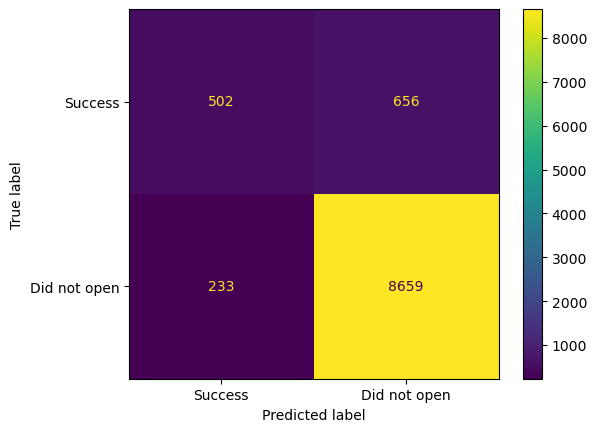

In [171]:
SVM_preds = SVM_pipe_grid.predict(X2_test)
SVM_confusion_mat = confusion_matrix(y2_test, SVM_preds, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=SVM_confusion_mat, display_labels=['Success', 'Did not open'])
disp.plot()
plt.show()

In [187]:
precision_score(y2_test, SVM_preds)

0.6829931972789116

In [189]:
recall_score(y2_test, SVM_preds)

0.43350604490500866

In [191]:
accuracy_score(y2_test, SVM_preds)

0.911542288557214

The recall rate seems quite low, should we have optimized for this instead? Let's reinitiate a new pipeline with probabilities = True so we can assess various levels of probabilities

In [194]:
start_time = time.time()
SVM_pipe_grid2 = Pipeline([('transformer', transformer),
                          ('selector', extractor),
                          ('grid', GridSearchCV(SVC(probability=True), param_grid=params4))
                         ])


SVM_pipe_grid2.fit(X2_train, y2_train)
SVM_pipe_grid2_time = round(time.time() - start_time, 3)
print(SVM_pipe_grid2_time)

809.224


In [201]:
low_preds = np.where(SVM_pipe_grid2.predict_proba(X2_test)[:, 1] > .30, 1, 0)
high_preds = np.where(SVM_pipe_grid2.predict_proba(X2_test)[:, 1] > .70, 1, 0)

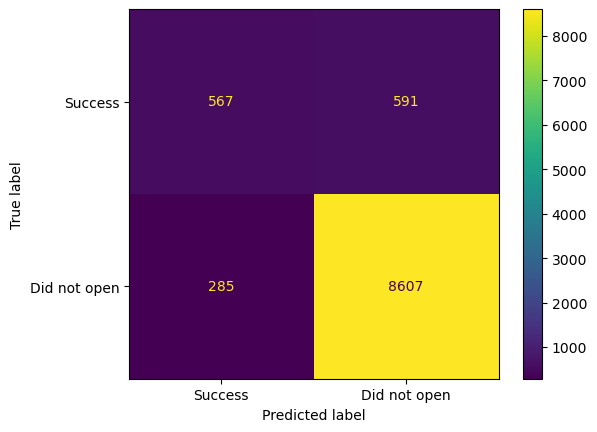

In [203]:
SVM_low = confusion_matrix(y2_test, low_preds, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=SVM_low, display_labels=['Success', 'Did not open'])
disp.plot()
plt.show()

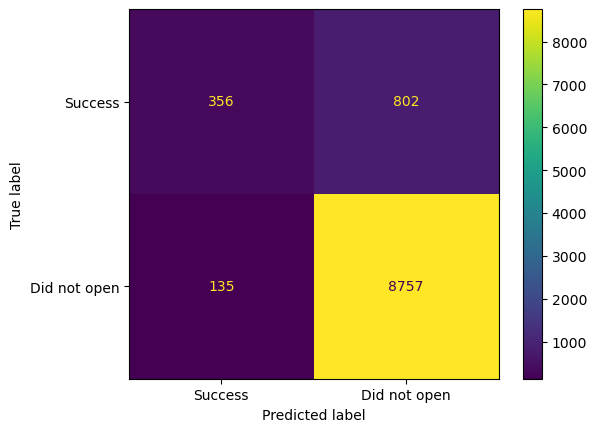

In [205]:
SVM_high = confusion_matrix(y2_test, high_preds, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=SVM_high, display_labels=['Success', 'Did not open'])
disp.plot()
plt.show()

##### Questions

#### As we can see, the recall rate doesn't change much so we're going to keep accuracy as our main performance metric. The final verdict with a grid search @ 91.2% is the support vector machine as the top model